In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# for local installation
# sys.path.append("../") # go to parent dir if running notebook directly in sub-folder

# for Google Colab
!git clone http://github.com/tjbarnum13/Fourier-DVR-1D.git
sys.path.insert(0,'/content/Fourier-DVR-1D')
from fourier_DVR_1D import Domain_Fourier_DVR_1D

In [30]:
# settings
m = 1.0 # particle mass
x_min = -15.0
x_max = 15.0
n_DVR = 300 # number of DVR grid points
n_g = 1001 # number of grid points for plotting
k = 1.0 # force constant
V = lambda x: 0.5 * k * x**2 # potential energy curve
n_plot = 3 # number of eigenstates to plot
scale = 1.0 # used to adjust size of wavefunctions on plot

In [31]:
# solve
domain = Domain_Fourier_DVR_1D(x_min, x_max, n_DVR)
E, E_four = domain.solve(m, V) 

# evaluate eigenstates on grid
x = np.linspace(x_min, x_max, n_g)
psi_x = domain.grid(x, E_four[:,:n_plot])

In [32]:
# print energies
for i, e in enumerate(E[:n_plot]):
    print('%3i %12.6f' % (i, e))

  0     0.500000
  1     1.500000
  2     2.500000


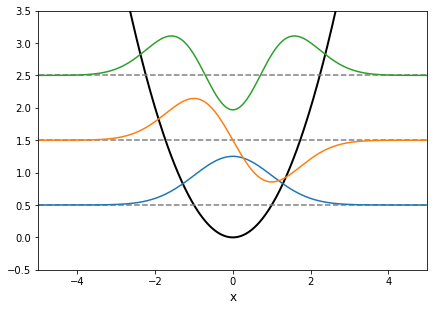

In [33]:
# plot eigenstates
plt.figure()
plt.subplots_adjust(left=0.05, right=0.95,
                    bottom=0.05, top=0.95)
plt.plot(x, V(x), 'k-', linewidth=2)
for i in range(n_plot):
    plt.plot([x[0], x[-1]], [E[i], E[i]], '--', color='gray')
for i in range(n_plot):
    plt.plot(x, scale * psi_x[i] + E[i])
plt.xlim(x_min+10, x_max-10)
plt.ylim(-E[0], E[n_plot])
plt.xlabel('x',fontsize=12)
plt.show()